In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [24]:
digits = load_digits()

In [25]:
print("Image data shape:", digits.data.shape)
print(digits.data[0])
print(len(digits.data[0]))
print("Label data shape:", digits.target.shape)

Image data shape: (1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
64
Label data shape: (1797,)


In [26]:
print(np.reshape(digits.data[0], (8, 8)))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


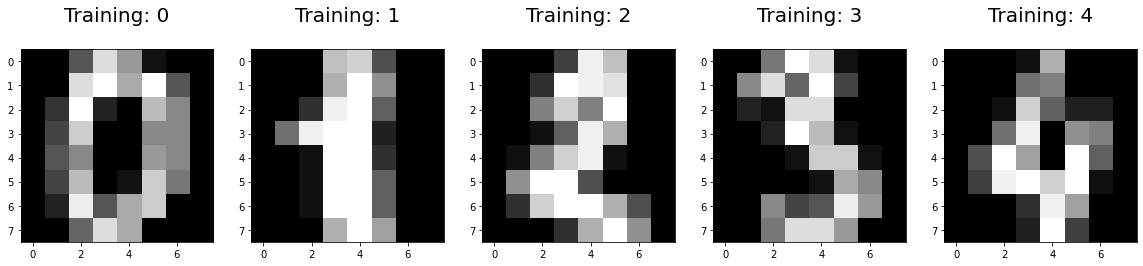

In [27]:
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[:5], digits.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray)
    plt.title("Training: {}\n".format(label), fontsize=20)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

In [29]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

LogisticRegression()

Text(0.5, 1.0, '2')

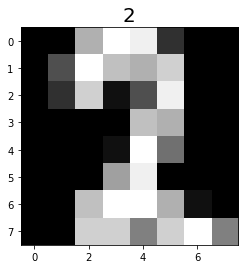

In [30]:
[predict] = logistic_regressor.predict(X_test[0].reshape(1, -1))
plt.imshow(X_test[0].reshape(8, 8), cmap=plt.cm.gray)
plt.title(predict, fontsize=20)

In [31]:
predictions = logistic_regressor.predict(X_test)

In [32]:
score = logistic_regressor.score(X_test, y_test)
score

0.9511111111111111

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
confusion_matrix

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

Text(0.5, 12.5, 'Predicted digits')

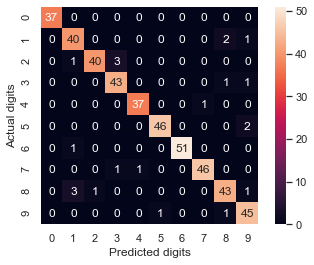

In [49]:
sns.heatmap(confusion_matrix, annot=True, square=True)
plt.ylabel("Actual digits")
plt.xlabel("Predicted digits")